In [ ]:
import os
# from google.colab import drive
# drive.mount('/content/drive/',force_remount=True)
# os.chdir('./drive/Shareddrives/CP3/TargetMol/FrozenVersions')
os.chdir('../../TargetMol-CP3/TargetMol-CP3/FrozenVersions')

In [ ]:
ls

 Volume in drive D is DataHome2T
 Volume Serial Number is E4C4-4C69

 Directory of d:\Akshar\ScottLokeyLab\TargetMol-CP3\TargetMol-CP3\FrozenVersions

2024-05-05  11:26    <DIR>          .
2024-05-05  11:26    <DIR>          ..
2023-05-16  12:41         6,280,650 L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535).xlsx
2023-08-14  20:09         6,282,627 L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_symbolCleaned.xlsx
2024-02-01  18:05           380,023 SP40275_PMA+noPMA_HD_horizconcat_UMAP.csv
2024-01-25  02:16           754,336 SP40275_PMA+noPMA_HD_longconcat_UMAP.csv
2024-01-24  04:19     2,480,292,875 TargetMol_10uM_DMSO+PMA_HistDiff_longconcat_IDnames.csv
2024-01-27  02:46     2,480,413,248 TargetMol_10uM_PMA+DMSO_HistDiff_horizconcat_IDnames.csv
2024-02-22  01:56     2,402,994,601 TargetMol_1-27_1uM+10uM_noPMA_horizconcat_HDpy_IDnames.csv
2024-02-22  01:53     2,399,523,276 TargetMol_1-27_1uM+10uM_PMA_horizconcat_HDpy_IDnames.csv
2024-02-22  01:37 

In [1]:
import copy

import umap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
import tqdm
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# print(torch.cuda.is_available())
# print(torch.cuda.current_device())

In [ ]:
# Key = pd.read_excel('/content/drive/Shareddrives/CP3/TargetMol/AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx',index_col='IDname',sheet_name='reducedKey')
Key = pd.read_excel(
    "../AnnotationWork/GPT annotations/reducedKey_cytoscapeAnnot.xlsx",
    index_col="IDname",
    sheet_name="reducedKey",
)

# pd.read_csv('../../../TargetMol-CP3/TargetMol-CP3/CP3-TargetMol/L4000-Bioactive Compound Library-Beverley Rabbitts (KIT10006535)_MapCleaned3_KSready2.csv',index_col='unambiguous_name')

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE


sm=SMOTE(random_state=15)

In [6]:
!pip install umap-learn

In [11]:

UMAP_Fullcor_transformer_05 = umap.UMAP(metric='correlation',
                                        n_components=32,
                                        n_neighbors=10,
                                        min_dist=0.5,
                                        angular_rp_forest=True,
                                        verbose=True,
                                        low_memory=True,
                                        # random_state=15
                                        )
# UMAP_Fullcor_transformer_08 = umap.UMAP(metric='correlation',
#                                         n_components=100,
#                                         n_neighbors=10,
#                                         min_dist=0.8,
#                                         angular_rp_forest=True,
#                                         verbose=True,
#                                         low_memory=True,
#                                         random_state=15)

KeyboardInterrupt: 

In [8]:
# full_longconcat_PMA_noPMA = pd.read_csv(
#     '/content/drive/Shareddrives/CP3/TargetMol/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA+noPMA_longconcat_HD_IDnames.csv',
#     index_col=0)
full_longconcat_PMA_noPMA = pd.read_csv(
    "TargetMol_1-27_1uM+10uM_PMA+noPMA_longconcat_HD_IDnames.csv",
    index_col=0,
)
#  FrozenVersions/TargetMol_1-27_1uM+10uM_PMA_horizconcat_HDpy_IDnames.csv
# full_noPMA = FrozenVersions/TargetMol_1-27_1uM+10uM_noPMA_horizconcat_HDpy_IDnames.csv

In [ ]:
UMAP_Fullcor_transformer_05.fit(full_longconcat_PMA_noPMA)
# UMAP_Fullcor_transformer_08.fit(full_longconcat_PMA_noPMA)

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.5, n_components=32, n_neighbors=10, verbose=True)
Tue May  7 23:55:40 2024 Construct fuzzy simplicial set
Tue May  7 23:55:41 2024 Finding Nearest Neighbors
Tue May  7 23:55:41 2024 Building RP forest with 15 trees
Tue May  7 23:56:12 2024 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
	Stopping threshold met -- exiting after 5 iterations
Tue May  7 23:57:27 2024 Finished Nearest Neighbor Search
Tue May  7 23:57:33 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue May  7 23:58:42 2024 Finished embedding


UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.5, n_components=32, n_neighbors=10, verbose=True)

In [ ]:
pd.DataFrame(UMAP_Fullcor_transformer_05.embedding_,
             index=full_longconcat_PMA_noPMA.index,
             columns=[f'UMAP_{i}' for i in range(UMAP_Fullcor_transformer_05.embedding_.shape[1])]).\
             to_csv('UMAP-05Correlation_PMA+noPMA_longtrain_forViz32.csv')
pickle.dump(UMAP_Fullcor_transformer_05,open('TargetMol_1-27_DMSO+PMA_longConcat_HDpy_32-UMAPTransformer_05.pkl','wb'))

Tue May  7 23:59:07 2024 Worst tree score: 0.48399479
Tue May  7 23:59:07 2024 Mean tree score: 0.48822781
Tue May  7 23:59:07 2024 Best tree score: 0.49247150
Tue May  7 23:59:15 2024 Forward diversification reduced edges from 437670 to 188231
Tue May  7 23:59:21 2024 Reverse diversification reduced edges from 188231 to 188231
Tue May  7 23:59:25 2024 Degree pruning reduced edges from 205494 to 205409
Tue May  7 23:59:25 2024 Resorting data and graph based on tree order
Tue May  7 23:59:28 2024 Building and compiling search function


CRASHED IN COLAB, run locally to pickle the transformer

In [ ]:
# clean up so session can continue:

del UMAP_Fullcor_transformer_05
del full_longconcat_PMA_noPMA

In [7]:
UMAP_PMA_noPMA_long = pd.read_csv('UMAP-05Correlation_PMA+noPMA_longtrain_forViz32.csv',index_col=0)

In [8]:
UMAP_PMA_noPMA_long

,UMAP_0,UMAP_1,UMAP_2,UMAP_3,UMAP_4,UMAP_5,UMAP_6,UMAP_7,UMAP_8,UMAP_9,...,UMAP_22,UMAP_23,UMAP_24,UMAP_25,UMAP_26,UMAP_27,UMAP_28,UMAP_29,UMAP_30,UMAP_31
Index,,,,,,,,,,,,,,,,,,,,,
T6207._.1uM._.F15._.SP7209,8.341892,3.031173,5.262392,4.987922,4.751984,4.786388,4.775361,5.054406,5.320679,4.341890,...,5.430635,4.346042,3.897797,4.318603,4.468162,4.401029,5.304502,4.995744,3.347411,4.811282
T4564._.1uM._.E08._.SP7209,8.561445,2.858702,4.922522,4.884696,4.780200,4.557732,4.694806,5.490778,4.890644,5.251181,...,4.776317,3.780589,4.624939,3.903930,4.472517,4.332107,5.664910,5.603471,3.582688,4.845224
T5009._.1uM._.B19._.SP7209,8.425224,3.010376,5.424011,4.810256,4.722114,4.621577,4.988794,5.232562,5.593903,4.724815,...,6.170443,4.086700,4.393135,4.080194,4.726988,4.725332,4.956672,4.882384,3.865159,4.667963
T4687._.1uM._.C12._.SP7209,8.591152,2.879422,5.287793,4.744562,4.692728,4.569669,4.894295,5.734399,5.501859,5.197539,...,5.724198,3.520060,5.048807,3.687797,4.524247,4.818364,5.011456,5.115048,3.600001,4.594715
T5039._.1uM._.G01._.SP7209,8.376907,2.926106,5.346455,5.056419,4.494899,4.833466,4.462604,5.522335,5.690450,4.447892,...,5.204283,3.508258,4.988305,3.402921,4.455047,4.808712,5.184582,4.800227,3.811434,5.008027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMSO_R._.10uM._.E20._.SP7237,8.372449,2.946309,5.091466,4.929394,4.765817,4.596284,5.034832,4.961073,4.975123,5.148090,...,5.580754,4.833264,4.480911,4.930343,5.157642,4.442754,5.150735,4.936284,4.527349,4.612352
DMSO_R._.10uM._.M13._.SP7237,8.329593,2.933676,5.129946,5.117626,4.801002,4.817976,4.855388,4.868339,4.885139,4.954956,...,5.510723,5.095745,4.601078,4.990606,5.337456,4.416083,5.503625,3.928875,4.481447,3.975067
Alrestatin_3._.10uM._.M20._.SP7237,8.372853,2.951446,5.089427,4.903103,4.769183,4.614256,5.069360,4.964146,5.008058,5.143861,...,5.551617,4.832941,4.549251,4.866022,5.131799,4.507748,5.075721,5.108890,4.601397,4.825725


In [ ]:
scalar = StandardScaler().fit(UMAP_PMA_noPMA_long)
pickle.dump(scalar,open('TargetMol_1-27_DMSO+PMA_longConcat_HDpy-32_UMAPTransScalar_05.pkl','wb'))

In [ ]:
scaled_UMAP_PMA_noPMA_long = pd.DataFrame(scalar.transform(UMAP_PMA_noPMA_long),
                                          index=UMAP_PMA_noPMA_long.index,
                                          columns=UMAP_PMA_noPMA_long.columns)

In [12]:
scaled_UMAP_PMA_noPMA_long

,UMAP_0,UMAP_1,UMAP_2,UMAP_3,UMAP_4,UMAP_5,UMAP_6,UMAP_7,UMAP_8,UMAP_9,...,UMAP_22,UMAP_23,UMAP_24,UMAP_25,UMAP_26,UMAP_27,UMAP_28,UMAP_29,UMAP_30,UMAP_31
Index,,,,,,,,,,,,,,,,,,,,,
T6207._.1uM._.F15._.SP7209,-0.230640,0.366704,0.564038,0.137958,-0.384552,-0.266202,-0.504946,-0.166344,0.613167,-1.443251,...,0.325207,-0.655243,-1.569909,-0.144218,-1.371859,-0.752621,0.263098,0.275813,-1.466467,0.053032
T4564._.1uM._.E08._.SP7209,0.378550,-0.270233,-0.507476,-0.171315,-0.281763,-0.775068,-0.660069,0.690788,-0.428918,0.503324,...,-0.762043,-1.356593,-0.590079,-0.777860,-1.360578,-0.891462,0.789030,1.111952,-1.203284,0.091829
T5009._.1uM._.B19._.SP7209,0.000580,0.289899,1.073578,-0.394342,-0.493363,-0.632982,-0.093940,0.183594,1.275259,-0.623499,...,1.554510,-0.976913,-0.902438,-0.508520,-0.701406,-0.099328,-0.244480,0.119848,-0.887309,-0.110783
T4687._.1uM._.C12._.SP7209,0.460977,-0.193713,0.644121,-0.591164,-0.600414,-0.748502,-0.275916,1.169316,1.052213,0.388490,...,0.813006,-1.679736,-0.018914,-1.108124,-1.226579,0.088080,-0.164536,0.439957,-1.183917,-0.194507
T5039._.1uM._.G01._.SP7209,-0.133484,-0.021309,0.829064,0.343179,-1.321079,-0.161433,-1.107217,0.752774,1.509218,-1.216326,...,-0.050912,-1.694374,-0.100441,-1.543428,-1.405831,0.068636,0.088102,0.006812,-0.947406,0.277915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMSO_R._.10uM._.E20._.SP7237,-0.145854,0.053300,0.025158,-0.037395,-0.334159,-0.689270,-0.005287,-0.349672,-0.224203,0.282632,...,0.574653,-0.050926,-0.784158,0.790553,0.414145,-0.668568,0.038711,0.194006,-0.146575,-0.174347
DMSO_R._.10uM._.M13._.SP7237,-0.264766,0.006645,0.146473,0.526559,-0.205984,-0.195906,-0.350839,-0.531822,-0.442258,-0.130821,...,0.458285,0.274638,-0.622232,0.882638,0.879926,-0.722295,0.553672,-1.192033,-0.197921,-0.902775
Alrestatin_3._.10uM._.M20._.SP7237,-0.144733,0.072270,0.018728,-0.116165,-0.321897,-0.649275,0.061204,-0.343635,-0.144393,0.273579,...,0.526236,-0.051326,-0.692070,0.692267,0.347201,-0.537641,-0.070754,0.431484,-0.063744,0.069541


In [ ]:
combined = pd.merge(left=scaled_UMAP_PMA_noPMA_long,right=Key['AL_CONSOLIDATED'],left_index=True,right_index=True)
X = combined.iloc[:, :-1].values
y = combined['AL_CONSOLIDATED'].values.reshape(-1,1)

In [10]:
classed_to_consider = [x for x in Key['AL_CONSOLIDATED'].value_counts()[Key['AL_CONSOLIDATED'].value_counts()>100].index.to_list()]
classed_to_consider = [c for c in classed_to_consider if c != 'Others']
display(classed_to_consider)

['Collected_Controls',
 'Metabolite',
 'COX',
 'AChR',
 'Apoptosis_Autophagy',
 'Antibacterial',
 'Adrenergic_Receptor',
 '5-HT',
 'Dopamine',
 'DNA/RNA_Associated',
 'NFkB',
 'PI3K',
 'Histamine_Receptor',
 'Topoisomerase',
 'Estrogen_Receptor',
 'CDK',
 'EGFR',
 'Sodium_Channel',
 'Calcium_Channel',
 'GABA',
 'Penicillin_Binding',
 'Cytochrome',
 'Potassium_Channel',
 'Bacterial_Ribosome',
 'HDAC',
 'PDE',
 'PPAR',
 'Microtubule_Associated',
 'Antioxidant',
 'Glucocorticoid_Receptor',
 'Transient_Receptor',
 'JAK',
 'MAO',
 'VEGFR',
 'Androgen_Receptor',
 'Antifungal',
 'HIV',
 'Prostaglandin',
 'MAPK',
 'Tyrosine_Kinase',
 'AMPK',
 'HSP',
 'Opioid_Receptor',
 'PARP',
 'mTOR',
 'AKT',
 'Mitochondria_Associated',
 'HIF',
 'c-Met_HGFR',
 'FGFR',
 'TGF',
 'STAT',
 'NOS',
 'ROS',
 'Wnt/beta-Catenin',
 'Fatty_Acid',
 'ERK',
 'Sirtuin',
 'Histone_Methyltransferase',
 'Parasite',
 'Serotonin',
 'BCL',
 'Steroid_Biosynthesis',
 'PKC',
 'NMDA_Receptor',
 'Anti-infection',
 'TLR',
 'GPCR',
 'A

In [ ]:

y_special = [y if y in classed_to_consider else 'Others' for y in combined['AL_CONSOLIDATED']]
X_res, y_res = sm.fit_resample(X,y_special)
print(f"Resampled dataset shape {Counter(y_res)}")

In [15]:
y_special_out = LabelEncoder().fit_transform(y_res)
# y_special_out = y_special.transform(combined['AL_CONSOLIDATED'])
X_train, X_test, y_train, y_test = train_test_split(X_res, y_special_out, train_size=0.7, shuffle=True)

In [16]:
gbc = HistGradientBoostingClassifier(random_state=15,verbose=True).fit(X_train,y_train)
display(gbc.score(X_test,y_test))

Binning 0.228 GB of training data: 3.136 s
Binning 0.025 GB of validation data: 0.213 s
Fitting gradient boosted rounds:
[1/100] 86 trees, 2666 leaves (31 on avg), max depth = 15, train loss: 3.97058, val loss: 4.00027, in 35.538s
[2/100] 86 trees, 2666 leaves (31 on avg), max depth = 18, train loss: 3.76255, val loss: 3.81225, in 14.180s
[3/100] 86 trees, 2666 leaves (31 on avg), max depth = 17, train loss: 3.64972, val loss: 3.74686, in 14.436s
[4/100] 86 trees, 2666 leaves (31 on avg), max depth = 18, train loss: 3.51139, val loss: 3.61323, in 14.768s
[5/100] 86 trees, 2666 leaves (31 on avg), max depth = 17, train loss: 3.42337, val loss: 3.54193, in 14.659s
[6/100] 86 trees, 2666 leaves (31 on avg), max depth = 16, train loss: 3.30134, val loss: 3.46659, in 15.207s
[7/100] 86 trees, 2666 leaves (31 on avg), max depth = 17, train loss: 3.25834, val loss: 3.39368, in 14.816s
[8/100] 86 trees, 2666 leaves (31 on avg), max depth = 18, train loss: 3.20511, val loss: 3.37670, in 17.648s

0.5148004996068783

<Figure size 2000x1000 with 0 Axes>

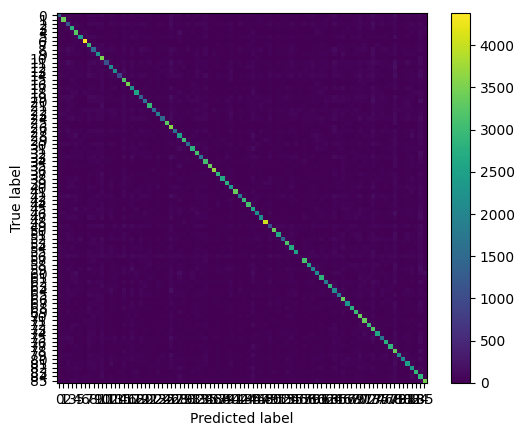

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.figure(figsize=(20,10))
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test,include_values=False) #,normalize='all'
# pcm = ax[0].imshow(g,norm=colors.PowerNorm(gamma=1./2.))
# fig.colorbar(pcm, ax=ax[0],extend='max')
# pcm = ax[1].imshow(g)
# fig.colorbar(pcm, ax=ax[1],extend='max')
plt.show()
plt.close()

In [18]:
import joblib

joblib.dump(gbc,"histGradientBoostClass_UMAP-32_PMA+noPMA_longtrain_05_wSMOTE.joblib")

['histGradientBoostClass_UMAP-32_PMA+noPMA_longtrain_05_wSMOTE.joblib']

In [19]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
clf_score = cross_val_score(gbc, X_res, y_special_out, cv=5, n_jobs=-1, verbose=1)
print(clf_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[0.53062092 0.5182483  0.53878274 0.53817003 0.54296542]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 31.5min finished


In [21]:
import pycaret

ModuleNotFoundError: No module named 'pycaret'